In [2]:
using Pkg

In [3]:
Pkg.add("Roots")
Pkg.add("ForwardDiff")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [================>                        ]  38.9 %Fetching: [==========================>              ]  63.8 % Resolving package versions...
 Installed PDMats ─ v0.9.6
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [90014a1f] ↑ PDMats v0.9.5 ⇒ v0.9.6
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [4]:
using Roots  
using Plots
using ForwardDiff

# 1. Test działania różnych metod dla wybranych funkcji

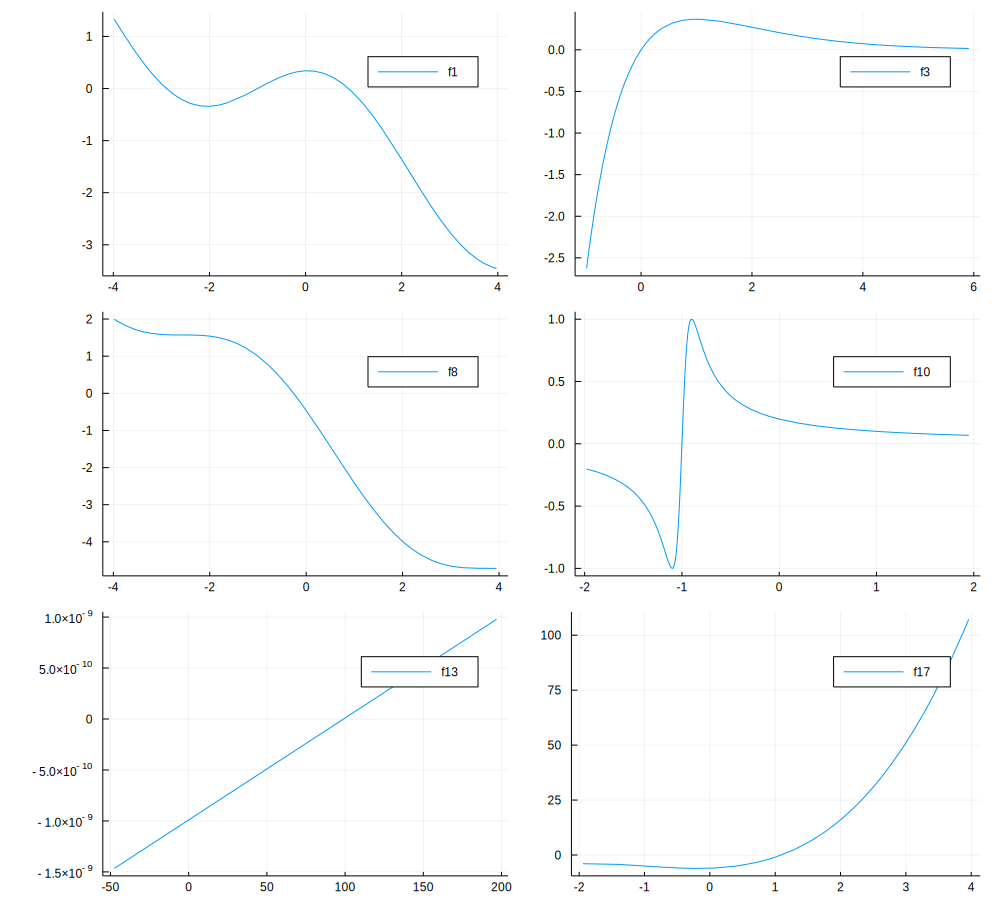

In [5]:
# http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html
# wybrane funkcje:

_f1(x) = sin(x) - x / 2
f1(x) = _f1(x + 1.0)
f1_range = (-4, 4)

f3(x) = x * exp(-x)
f3_range = (-1, 6)

f6(x) = exp(x) - 2 - 1 / (10 * x)^2 + 2 / (100 * x)^3
#f6(x) = _f6(x + 1.0)
f6_range = (-4, 3)

_f8(x) = cos(x) - x
f8(x) = _f8(x + 1.0)
f8_range = (-4, 4)

_f10(x) = 20.0 * x / (100.0 * x * x + 1.0)
f10(x) = _f10(x + 1.0)
f10_range = (-2, 2)

_f13(x) = 0.00000000001 * (x - 100.0)
f13(x) = _f13(x + 1.0)
f13_range = (-50, 200)

_f17(x) = x^3 - 2*x - 5
f17(x) = _f17(x + 1.0)
f17_range = (-2, 4)

p1 = plot(f1, f1_range[1], f1_range[2], label="f1")
p3 = plot(f3, f3_range[1], f3_range[2], label="f3")
#p6 = plot(f6, f6_range[1], f6_range[2], label="f6")
p8 = plot(f8, f8_range[1], f8_range[2], label="f8")
p10 = plot(f10, f10_range[1], f10_range[2], label="f10")
p13 = plot(f13, f13_range[1], f13_range[2], label="f13")
p17 = plot(f17, f17_range[1], f17_range[2], label="f17")

plot(p1, p3, p8, p10, p13, p17, layout=(3,2), size=(1000, 900))

In [6]:
using DataFrames
using CSV

In [7]:
algorithms = [FalsePosition(), Roots.Newton(), Roots.Steffensen()]
functions = [f1, f3, f8, f10, f13, f17]
ranges = [(-4.5, -1.1), (-1.0, 4.0), (-4.0, 4.0), (-2.0, 10.0), (-50.0, 150.0), (-2.0, 4.0)]
starting_points = [-0.2, -1.0, -1.7, -1.02, 500.0, 4.0]
fnames = ["f1", "f3", "f8", "f10", "f13", "f17"]
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

In [8]:
results = DataFrame(
    name = String[],
    method = String[],
    x = Float32[],
    f_x = Float32[],
    sign_change = Bool[],
    is_zero = Bool[]
)

,name,method,x,f_x,sign_change,is_zero
,String,String,Float32,Float32,Bool,Bool


In [9]:
for test_set=zip(functions, ranges, starting_points, fnames)
    fun = test_set[1]
    range = test_set[2]
    starting_point = test_set[3]
    name = test_set[4]

    x = find_zero(fun, range, FalsePosition(), verbose=true)
    sign_change = fun(prevfloat(x)) * fun(x) < 0.0 || fun(x) * fun(nextfloat(x)) < 0.0
    push!(results, [name "falsi" x fun(x) sign_change iszero(fun(x))])
    
    x = find_zero((fun, D(fun)), starting_point, Roots.Newton(), verbose=true)    
    sign_change = fun(prevfloat(x)) * fun(x) < 0.0 || fun(x) * fun(nextfloat(x)) < 0.0
    push!(results, [name "newton" x fun(x) sign_change iszero(fun(x))])
    
    x = find_zero(fun, starting_point, Roots.Steffensen(), verbose=true) 
    sign_change = fun(prevfloat(x)) * fun(x) < 0.0 || fun(x) * fun(nextfloat(x)) < 0.0
    push!(results, [name "steffensen" x fun(x) sign_change iszero(fun(x))])
end

Results of univariate zero finding:

* Converged to: -2.895494267033981
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = (-4.5000000000000000, -1.1000000000000001)
(a_1, b_1) = (-4.5000000000000000, -2.7999999999999998)
(a_2, b_2) = (-2.7999999999999998, -2.9255409724929318)
(a_3, b_3) = (-2.9255409724929318, -2.8937563863899567)
(a_4, b_4) = (-2.9255409724929318, -2.8954646365086854)
(a_5, b_5) = (-2.8954646365086854, -2.8954942676428854)
(a_6, b_6) = (-2.8954942676428854, -2.8954942670339703)
(a_7, b_7) = (-2.8954942676428854, -2.8954942670339809)

Results of univariate zero finding:

* Converged to: -2.895494267033981
* Algorithm: Roots.Newton()
* iterations: 7
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -0.2000000000000000,	 fx_0 =  0.3173560908995228
x_1 = -1.8133465500631434,	 fx_1 = -0


* Converged to: -1.0
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0200000000000000,	 fx_0 = -0.3846153846153850
x_1 = -0.9983333333333333,	 fx_1 =  0.0333240766453771
x_2 = -1.0000009261831990,	 fx_2 = -0.0000185236639789
x_3 = -0.9999999999999999,	 fx_3 =  0.0000000000000022
x_4 = -1.0000000000000000,	 fx_4 =  0.0000000000000000

Results of univariate zero finding:

* Converged to: -1.0
* Algorithm: Roots.Steffensen()
* iterations: 4
* function evaluations: 7
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0200000000000000,	 fx_0 = -0.3846153846153850
x_1 = -0.9983341112096208,	 fx_1 =  0.0333085320721878
x_2 = -1.0000608823342949,	 fx_2 = -0.0012176462345583
x_3 = -0.9999999837216763,	 fx_3 =  0.0000003255664738
x_4 = -1.0000000000000000,	 fx_4 =  0.0000000000000000

Results of univariate zero finding:

* Converged to: 98.994391877202

In [10]:
iters = [7, 7, 5, 41, 7, 8, 8, 7, 7, 1, 4, 4, 5, 1, 1, 11, 7, 9]
evals = [9, 15, 9, 43, 15, 12, 10, 15, 11, 3, 9, 7, 7, 3, 4, 13, 15, 13]
results[:iterations] = iters
results[:evaluations] = evals
#show(results, allrows=true, allcols=true)
results

,name,method,x,f_x,sign_change,is_zero,iterations,evaluations
,String,String,Float32,Float32,Bool,Bool,Int64,Int64
1,f1,falsi,-2.89549,0.0,false,true,7,9
2,f1,newton,-2.89549,0.0,false,true,7,15
3,f1,steffensen,-1.0,-1.11022e-16,false,false,5,9
4,f3,falsi,1.81899e-12,1.81899e-12,false,false,41,43
5,f3,newton,-8.81e-27,-8.81e-27,false,false,7,15
6,f3,steffensen,0.0,0.0,false,true,8,12
7,f8,falsi,-0.260915,0.0,false,true,8,10
8,f8,newton,-0.260915,1.11022e-16,false,false,7,15
9,f8,steffensen,-0.260915,0.0,false,true,7,11


# 2. Trudna funkcja

Szukanie pierwiastków z wykorzystaniem metody reguły falsi ma gwarantowaną zbieżność (przy spełnieniu założeń dotyczących ciągłości funkcji i znaków na krańcach przedziału), stąd metoda bezproblemowo radzi sobie z tego typu przykładami.

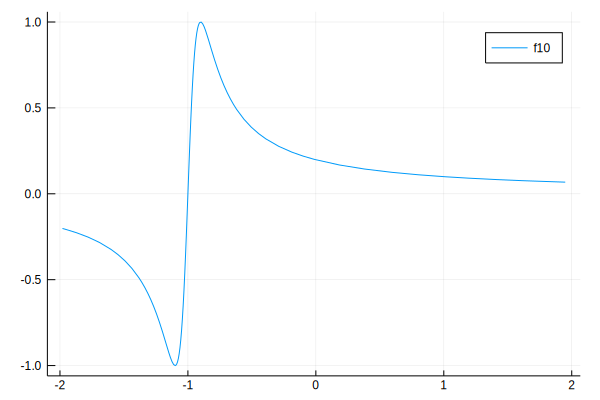

In [43]:
plot(p10)

In [45]:
falsi_result = find_zero(f10, (-100, 100), FalsePosition(), verbose=true)

Results of univariate zero finding:

* Converged to: -1.0
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 24
* function evaluations: 26
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = (-100.0000000000000000,  0.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000, -50.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000, -49.7967488105657452)
(a_3, b_3) = ( 0.0000000000000000, -49.3918721259526592)
(a_4, b_4) = ( 0.0000000000000000, -48.5886229304120150)
(a_5, b_5) = ( 0.0000000000000000, -47.0081463904126053)
(a_6, b_6) = ( 0.0000000000000000, -43.9512256353502764)
(a_7, b_7) = ( 0.0000000000000000, -38.2515390838770557)
(a_8, b_8) = ( 0.0000000000000000, -28.4692809708536174)
(a_9, b_9) = ( 0.0000000000000000, -14.7361272506181606)
(a_10, b_10) = ( 0.0000000000000000, -3.1173059782341461)
(a_11, b_11) = (-3.1173059782341461, -0.0632882238546215)
(a_12, b_12) = (-0.0632882238546215, -2.1746714058312762)
(a_13, b_13) = (-0.0632882238

-1.0

In [46]:
test_points = -1.1:0.01:-1.0

-1.1:0.01:-1.0

In [51]:
newton_results = [(start_x, find_zero((f10, D(f10)), start_x, Roots.Newton())) for start_x in test_points]

11-element Array{Tuple{Float64,Float64},1}:
 (-1.1, -1.125899906842635e14)
 (-1.09, 2.6337026043843374e7)
 (-1.08, 2.2478981826304518e7)
 (-1.07, 2.0936023036669612e7)
 (-1.06, -1.770931431627799e7)
 (-1.05, -1.0)                
 (-1.04, -1.0)                
 (-1.03, -1.0)                
 (-1.02, -1.0)                
 (-1.01, -1.0)                
 (-1.0, -1.0)                 

In [50]:
stef_results = [(start_x, find_zero(f10, start_x, Roots.Steffensen())) for start_x in test_points]

11-element Array{Tuple{Float64,Float64},1}:
 (-1.1, 2.7042893504679464e7) 
 (-1.09, 2.2265045583756417e7)
 (-1.08, 1.5779801699542217e7)
 (-1.07, -1.0)                
 (-1.06, -1.0)                
 (-1.05, -1.0)                
 (-1.04, -1.0)                
 (-1.03, -1.0)                
 (-1.02, -1.0)                
 (-1.01, -1.0)                
 (-1.0, -1.0)                 

Zauważmy jednak, że dla metod korzystających z pochodnej (lub ją przybliżających), jeśli początkowy punkt dla przykładu funkcji f10 nie jest dobrany odpowiednio blisko pierwiastka, każda kolejna iteracja powoduje oddalenie od miejsca zerowego.

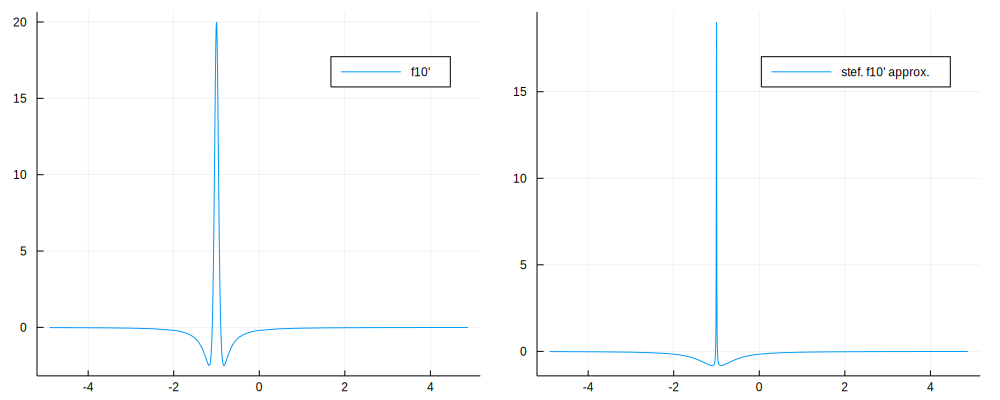

In [49]:
stef_approx(x) = (f10(x + f10(x)) - f10(x))/f10(x)
derp = plot(D(f10), label="f10'")
stefp = plot(stef_approx, label="stef. f10' approx.")
plot(derp, stefp, layout=(1, 2), size=(1000, 400))

# 3. Niedziałający przykład

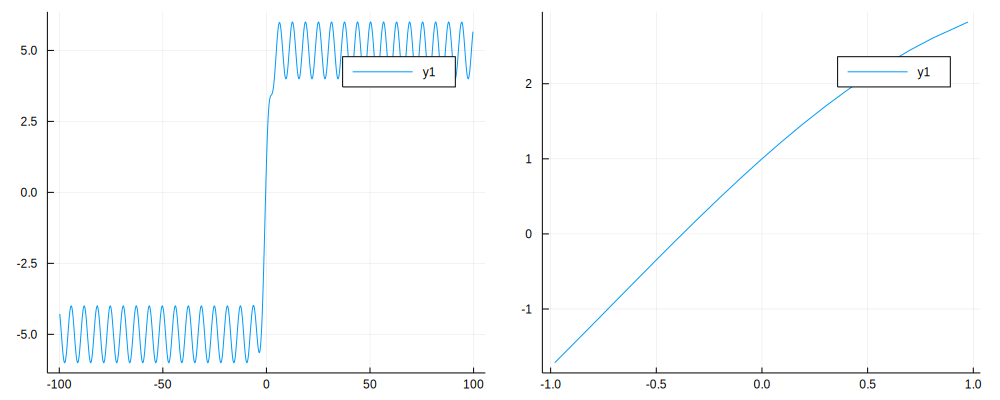

In [11]:
sigmoid(x) = 1.0 / (1.0 + exp(-x))
f_hard(x) = cos(x) + 10.0 * sigmoid(x) - 5.0

hard_global = plot(f_hard, -100, 100)
hard_local = plot(f_hard, -1, 1)
plot(hard_global, hard_local, layout=(1, 2), size=(1000, 400))

In [39]:
points2 = -10.:1.0:10.0
newton2 = [
    (start_x, 
    try
        find_zero((f_hard, D(f_hard)), start_x, Roots.Newton(), verbose=true)
    catch
        NaN
    end
    )
    for start_x in points2
]
stef2 = [
    (start_x, 
    try
        find_zero(f_hard, start_x, Roots.Steffensen(), verbose=true)
    catch
        NaN
    end
    )
    for start_x in points2
]

Results of univariate zero finding:

* Convergence failed: Too many steps taken. 
* Algorithm Roots.Newton()

Trace:
x_0 = -10.0000000000000000,	 fx_0 = -5.8386175503894284
x_1 = -20.7412994331699103,	 fx_1 = -5.3154655109463231
x_2 = -15.1398050938499722,	 fx_2 = -5.8428907949805380
x_3 = -4.2810917236367683,	 fx_3 = -5.2816599692759061
x_4 = -11.1058697182258204,	 fx_4 = -4.8897778223216966
x_5 = -16.0262850555975760,	 fx_5 = -5.9497608944535019
x_6 = -35.0368062057602714,	 fx_6 = -5.8873239383391613
x_7 = -47.8035128459058001,	 fx_7 = -5.7778096920235384
x_8 = -56.9965294145823265,	 fx_8 = -4.0986248484563177
x_9 = -47.5317371313036716,	 fx_9 = -5.9179767725420085
x_10 = -62.4522295936553604,	 fx_10 = -4.0711957705897142
x_11 = -73.4385134125549257,	 fx_11 = -5.3791836906629982
x_12 = -79.2518271210092564,	 fx_12 = -5.7570496486199509
x_13 = -88.0633138674919138,	 fx_13 = -4.0048688204123941
x_14 = -47.4292097043492049,	 fx_14 = -5.9537508398251786
x_15 = -67.2355456679432706,	 fx_1

x_1 = -13.4347006237188644,	 fx_1 = -4.3538832956776172
x_2 = -7.7304176078976754,	 fx_2 = -4.8723594868939637
x_3 = -2.8422420565847677,	 fx_3 = -5.4046909657065845
x_4 =  3.7860696197810650,	 fx_4 =  3.9787717970945078
x_5 = -1.0798917530288064,	 fx_5 = -1.9933111498938683
x_6 = -0.3614299509507563,	 fx_6 =  0.0415267247895983
x_7 = -0.3764014820501575,	 fx_7 = -0.0000555342468704
x_8 = -0.3763815134395502,	 fx_8 = -0.0000000000959117
x_9 = -0.3763815134050628,	 fx_9 = -0.0000000000000009
x_10 = -0.3763815134050625,	 fx_10 =  0.0000000000000009
x_11 = -0.3763815134050628,	 fx_11 = -0.0000000000000009
x_12 = -0.3763815134050625,	 fx_12 =  0.0000000000000009
x_13 = -0.3763815134050628,	 fx_13 = -0.0000000000000009
x_14 = -0.3763815134050625,	 fx_14 =  0.0000000000000009
x_15 = -0.3763815134050628,	 fx_15 = -0.0000000000000009
x_16 = -0.3763815134050625,	 fx_16 =  0.0000000000000009
x_17 = -0.3763815134050628,	 fx_17 = -0.0000000000000009
x_18 = -0.3763815134050625,	 fx_18 =  0.00000000


* Converged to: -0.37638151340506276
* Algorithm: Roots.Newton()
* iterations: 7
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  3.0000000000000000,	 fx_0 =  3.5357487716238882
x_1 = -8.3819011506574146,	 fx_1 = -5.5014479747089373
x_2 = -2.0302581283561745,	 fx_2 = -4.2828414131025720
x_3 =  0.1978229201270683,	 fx_3 =  1.4734475309792092
x_4 = -0.4486628215207583,	 fx_4 = -0.2021846841877757
x_5 = -0.3767635138038974,	 fx_5 = -0.0010624040022646
x_6 = -0.3763815260160258,	 fx_6 = -0.0000000350719400
x_7 = -0.3763815134050628,	 fx_7 =  0.0000000000000000

Results of univariate zero finding:

* Converged to: -0.37638151340506265
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  4.0000000000000000,	 fx_0 =  4.1664942795154722
x_1 = -0.4636408246366726,	 fx_1 = -0.2443450224831878
x_2 = -0.3769175899144820,	 fx_2 = -0.00

x_4 =  65.6060954994463543,	 fx_4 =  4.0667177293979773
x_5 =  76.9294672661189622,	 fx_5 =  5.0395424347876947
x_6 =  81.9729542520271366,	 fx_6 =  5.9578008614682236
x_7 =  102.7005978550254213,	 fx_7 =  4.4363180929314829
x_8 =  108.0714953230250899,	 fx_8 =  5.3083435313583163
x_9 =  113.6517356506594041,	 fx_9 =  5.8502163893257713
x_10 =  124.7646641634578941,	 fx_10 =  5.6223601256395614
x_11 =  117.5816602064402190,	 fx_11 =  4.7739076253421615
x_12 =  112.6808503539327972,	 fx_12 =  5.9145165037323011
x_13 =  98.0608106341115047,	 fx_13 =  4.2170723540120303
x_14 =  91.2821805472932795,	 fx_14 =  4.0154469398007961
x_15 =  68.3481013973445783,	 fx_15 =  5.7200395735544767
x_16 =  60.1051736944683057,	 fx_16 =  4.0848487168089171
x_17 =  49.9718528250848522,	 fx_17 =  5.9571996642881402
x_18 =  29.3892164166435634,	 fx_18 =  4.5597170456316345
x_19 =  24.3107835442201363,	 fx_19 =  5.6807885477527158
x_20 =  16.5552290819550798,	 fx_20 =  4.3379645373685491
x_21 =  10.767214942

x_6 = -115.2856142352904101,	 fx_6 = -5.5789842840022095
x_7 = -2294.1067000777302383,	 fx_7 = -4.2642771318169395
x_8 = -9361.1534680481217947,	 fx_8 = -4.2980322179110750
x_9 = -9416.6878089994952461,	 fx_9 = -5.2339807998001069
x_10 = -9388.1624170510531258,	 fx_10 = -4.5318215649874496
x_11 = -9402.6098602181518800,	 fx_11 = -5.9843848081902822
x_12 = -13769.5842221293532930,	 fx_12 = -5.9998658744711815
x_13 = -12749.3236174670601031,	 fx_13 = -4.2619558491570437
x_14 = -12760.2212577360805881,	 fx_14 = -4.4006449369123581
x_15 = -13669.8936140791884100,	 fx_15 = -5.6793070914623964
x_16 = -13609.8129286066377972,	 fx_16 = -4.0925212338683199
x_17 = -13619.2403396697191056,	 fx_17 = -5.9063694606453607
x_18 = -13459.9825228784775391,	 fx_18 = -4.8296336651775551
x_19 = -13480.6417419412537129,	 fx_19 = -5.9977115710214504
x_20 = -12875.2460045745065145,	 fx_20 = -4.4591173453653488
x_21 = -12888.5847166979365284,	 fx_21 = -5.1995075538586208
x_22 = -12924.1663750446896302,	 fx_22 

x_0 =  1.0000000000000000,	 fx_0 =  2.8508880921681889
x_1 = -1.5349249997533767,	 fx_1 = -3.1913939458226870
x_2 = -0.1960361086916984,	 fx_2 =  0.4923196202135305
x_3 = -0.3749754476329932,	 fx_3 =  0.0039098876650812
x_4 = -0.3764079185022237,	 fx_4 = -0.0000734345266657
x_5 = -0.3763815132976514,	 fx_5 =  0.0000000002987175
x_6 = -0.3763815134050625,	 fx_6 =  0.0000000000000009
x_7 = -0.3763815134050628,	 fx_7 =  0.0000000000000000

Results of univariate zero finding:

* Convergence failed: Too many steps taken. 
* Algorithm Roots.Steffensen()

Trace:
x_0 =  2.0000000000000000,	 fx_0 =  3.3918239432316817
x_1 = -22.1175332755336314,	 fx_1 = -5.9920240764331538
x_2 = -6.7173648426760781,	 fx_2 = -4.0807019090380168
x_3 =  26.1622290821490893,	 fx_3 =  5.5152578401264876
x_4 =  7.2647510899288719,	 fx_4 =  5.5487286251633243
x_5 =  3140.0558393008682287,	 fx_5 =  5.0339754979574671
x_6 =  33776.8654957608450786,	 fx_6 =  5.0320751877152627
x_7 =  33802.9478222481920966,	 fx_7 =  5.83

x_34 = -6812.9464375490988459,	 fx_34 = -5.3919665645146928
x_35 = -6846.7045298180501050,	 fx_35 = -5.3863386155359283
x_36 = -6796.2882626625205376,	 fx_36 = -5.5205059409843082
x_37 = -6727.9120961394091864,	 fx_37 = -4.8097385278550551
x_38 = -6699.1860133079517254,	 fx_38 = -4.7426097601126136
x_39 = -6717.6909348930685155,	 fx_39 = -4.4312750942573533
x_40 = -7025.7718158861307529,	 fx_40 = -4.6104399410027730
x_41 = -7041.5706513951590750,	 fx_41 = -5.3043744264571631

Results of univariate zero finding:

* Convergence failed: Too many steps taken. 
* Algorithm Roots.Steffensen()

Trace:
x_0 =  8.0000000000000000,	 fx_0 =  4.8511464648867229
x_1 =  12.9199996976203870,	 fx_1 =  5.9380976392042051
x_2 = -13.9583360359694524,	 fx_2 = -4.8221120861738127
x_3 = -1.9129994760793370,	 fx_3 = -4.0491207956463446
x_4 =  61.1834717945463638,	 fx_4 =  4.9224928622480633
x_5 =  26.5640664895268799,	 fx_5 =  5.1390193361982774
x_6 =  848.2178348462178974,	 fx_6 =  5.9999258049477255
x_7 = -

21-element Array{Tuple{Float64,Float64},1}:
 (-10.0, NaN)                
 (-9.0, -0.3763815134050627) 
 (-8.0, NaN)                 
 (-7.0, -0.3763815134050626) 
 (-6.0, NaN)                 
 (-5.0, NaN)                 
 (-4.0, NaN)                 
 (-3.0, -0.37638151340506276)
 (-2.0, -0.3763815134050626) 
 (-1.0, -0.3763815134050626) 
 (0.0, -0.37638151340506276) 
 (1.0, -0.37638151340506276) 
 (2.0, NaN)                  
 (3.0, -0.37638151340506276) 
 (4.0, -0.37638151340506265) 
 (5.0, -0.3763815134050626)  
 (6.0, NaN)                  
 (7.0, NaN)                  
 (8.0, NaN)                  
 (9.0, -0.37638151340506276) 
 (10.0, NaN)                 

In [40]:
newton2

21-element Array{Tuple{Float64,Float64},1}:
 (-10.0, NaN)                
 (-9.0, -0.37638151340506276)
 (-8.0, -0.3763815134050627) 
 (-7.0, -0.3763815134050627) 
 (-6.0, -0.37638151340506254)
 (-5.0, NaN)                 
 (-4.0, -0.3763815134050628) 
 (-3.0, NaN)                 
 (-2.0, -0.37638151340506265)
 (-1.0, -0.37638151340506276)
 (0.0, -0.37638151340506276) 
 (1.0, -0.37638151340506276) 
 (2.0, NaN)                  
 (3.0, -0.37638151340506276) 
 (4.0, -0.37638151340506265) 
 (5.0, -0.3763815134050629)  
 (6.0, NaN)                  
 (7.0, NaN)                  
 (8.0, -0.3763815134050627)  
 (9.0, -0.37638151340506265) 
 (10.0, NaN)                 

In [41]:
stef2

21-element Array{Tuple{Float64,Float64},1}:
 (-10.0, NaN)                
 (-9.0, -0.3763815134050627) 
 (-8.0, NaN)                 
 (-7.0, -0.3763815134050626) 
 (-6.0, NaN)                 
 (-5.0, NaN)                 
 (-4.0, NaN)                 
 (-3.0, -0.37638151340506276)
 (-2.0, -0.3763815134050626) 
 (-1.0, -0.3763815134050626) 
 (0.0, -0.37638151340506276) 
 (1.0, -0.37638151340506276) 
 (2.0, NaN)                  
 (3.0, -0.37638151340506276) 
 (4.0, -0.37638151340506265) 
 (5.0, -0.3763815134050626)  
 (6.0, NaN)                  
 (7.0, NaN)                  
 (8.0, NaN)                  
 (9.0, -0.37638151340506276) 
 (10.0, NaN)                 

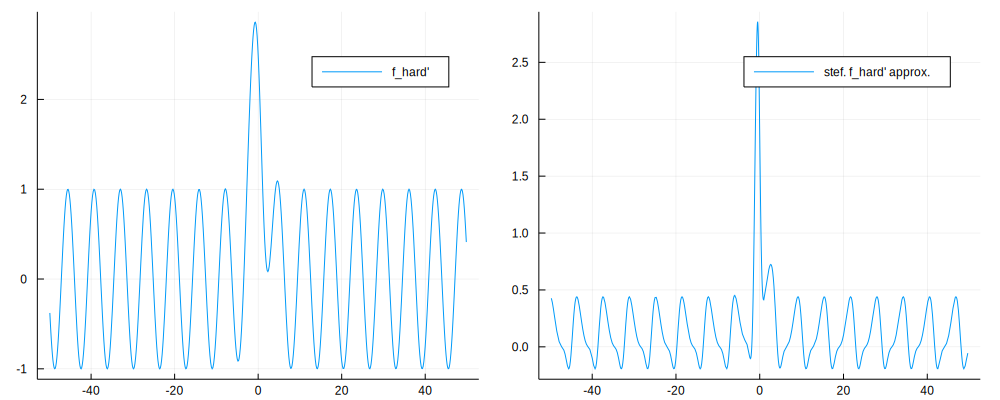

In [17]:
approx(x) = (f_hard(x + f_hard(x)) - f_hard(x))/f_hard(x)
derp = plot(D(f_hard), -50, 50, label="f_hard'")
stefp = plot(approx, -50, 50, label="stef. f_hard' approx.")
plot(derp, stefp, layout=(1, 2), size=(1000, 400))